In [1]:
import numpy as np
from sklearn.datasets import fetch_openml 
import matplotlib.pyplot as plt

In [2]:
# download the set by using fetch_openml module
mnist = fetch_openml('mnist_784', version=1) 
dataset = mnist["data"]

dataset = dataset[:2000]

In [3]:
# ensure that our matrix has the dimensions of 2000 x 784
print(dataset.shape)

(2000, 784)


In [7]:
def my_kmeans(data, K, M):
    """
    Perform a k-means clustering of the 2000 images of digits.

    Args:
        matrix : data matrix containing information about all of our images
        K : number of clusters
        M : number of initializations

    Returns a list containing the following:
        1) The K centroids and cluster assignments for the best solution with the lowest loss function
        2) The (non-increasing) sequence of values of the loss-function over k-means iterations for the best solution
        3) The set of N terminal loss-function values for all initializations
    """
    num_points = len(data)
    
    # need to convert dataset to a 1-D array so we can easily iterate through it
    data = np.asarray(data)
    
    # lists to hold our return values
    final_clusters = []
    final_centroids = []
    losses = []
    final_losses = []
    
        # list to hold our MSEs for the 15 iterations
    MSEs = []
    
    # run outer for loop depending on M initializations
    for i in range(M):
        # defines which of the K centroids each row of the matrix is closest to
        class_list = np.zeros(num_points)
        
        # initialize our random K centroids
        inits = np.random.choice(2000, K, replace=False)
        
        # fill initial centroid list with K random points from the matrix
        centroids = np.asarray([data[index] for index in inits])

        loss = []
        while True:
            # calculate the distance of all instances to the K centroids and assign instances to closest centroid
            # in other words, recompute cluster membership
            for j in range(num_points):
                # caluclate the Euclidean distance for all of our data points
                distances = np.linalg.norm(data[j]-centroids, axis=1)
                
                # assign each data point to the closest cluster centroid
                cluster = np.argmin(distances)
                
                # keep track of which cluster each data point is in
                class_list[j] = cluster
                
            # make a copy of our current centroids so we can compare to the new ones later
            test = np.copy(centroids)
            
            #initialize our loss value for this iteration
            loss_value = 0
            
            
            # calculate our loss function; recompute the K centroids
            for j in range(K):
                # find all points associated with respective centroid
                cluster_points = []
                for m in range(num_points):
                    if class_list[m] == j:
                        cluster_points.append(data[m])
                
                # calculate our new centroids
                centroids[j] = np.mean(cluster_points, axis=0)
                
                # calculate mean square error (MSE) for each point
                for item in cluster_points:
                    loss_value += np.linalg.norm(item-centroids[j])
            loss_value = loss_value / num_points
            loss.append(loss_value)
            
            # if all new centroids are equal to the old centroids, we can stop our while loop; this indicates convergence
            if np.all(np.equal(test, centroids)):
                break
        
        # MSE will be final loss value of respective iteration
        MSEs.append(loss_value)
                
        # append and plot our results
        final_centroids.append(centroids)
        final_clusters.append(cluster_points)
        losses.append(loss)
        final_losses.append(loss[-1])
        
        # plot our loss results for the respective iteration
        plt.plot(loss)
        plt.title("Iteration: {}".format(i+1))
        plt.xlabel("K-value")
        plt.ylabel("Loss")
        plt.show()
        
    # plot our MSEs over the M iterations
    x = []
    for iteration in range(M):
        x.append(iteration)
    plt.plot(x, MSEs)    
    plt.title("MSE Values over M Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.show()
    
    min_index = final_losses.index(min(final_losses))
    best_values = [final_centroids[min_index], final_clusters[min_index], losses[min_index], final_losses]
    return best_values

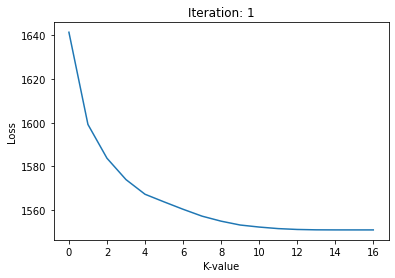

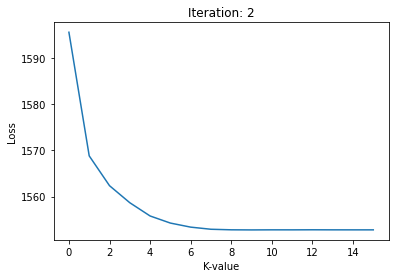

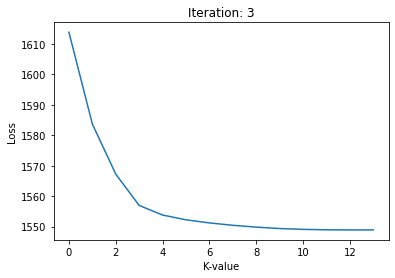

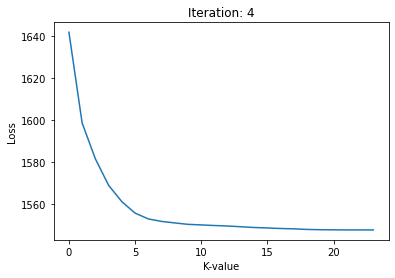

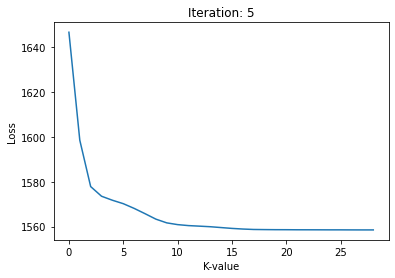

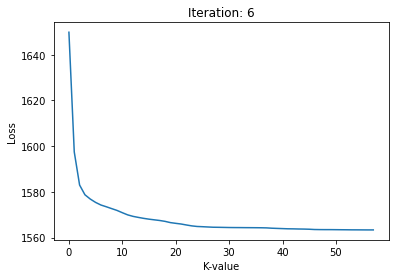

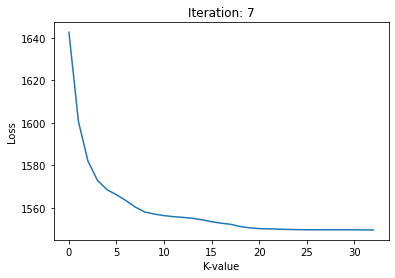

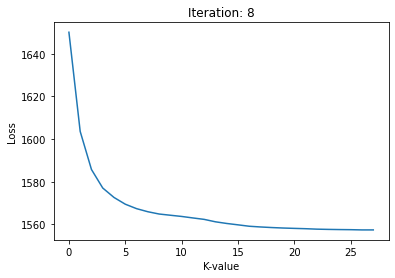

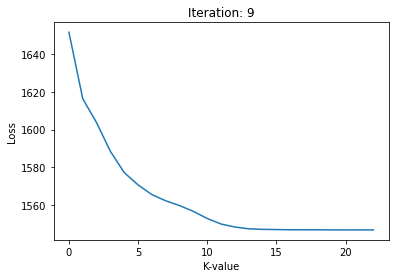

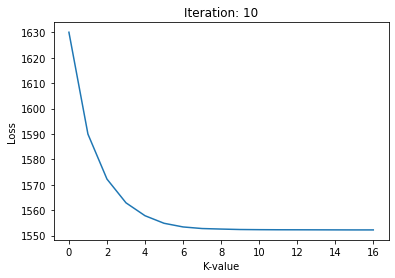

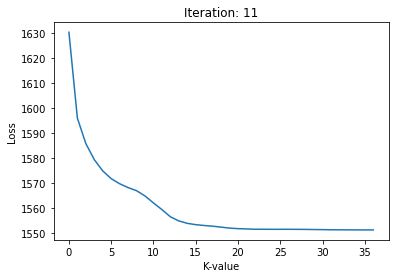

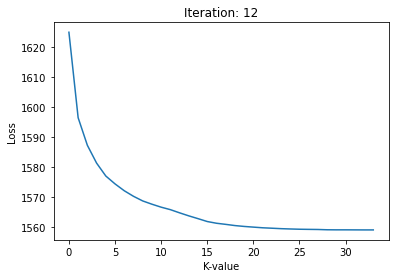

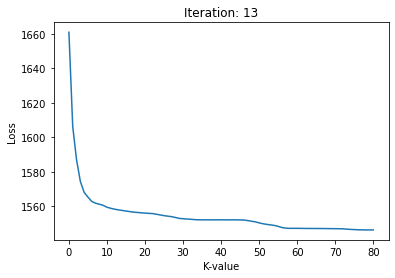

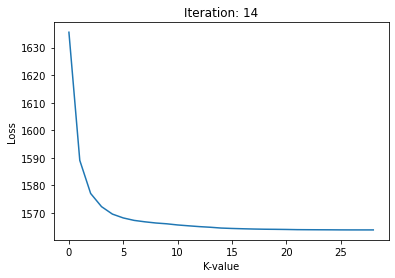

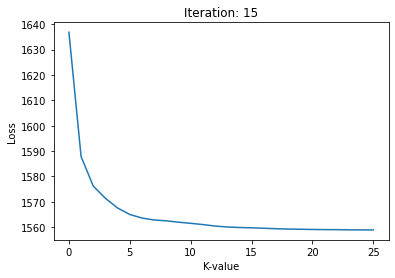

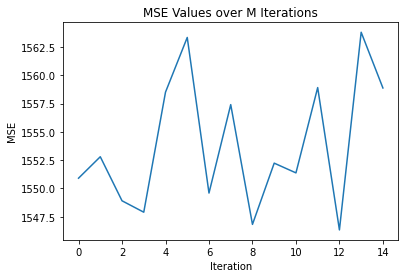

Best K final centroids:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Best final cluster assignments:
 [array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,

In [8]:
K = 10
M = 15
results = []
results = my_kmeans(dataset, K, M)


print("Best K final centroids:\n", results[0])
print("\nBest final cluster assignments:\n", results[1])
print("\nAll loss values of the best k-means iteration:\n", results[2])
print("\nFinal losses of all N iterations:\n", results[3])